In [ ]:
!import kagglehub[pandas-dataset]

/bin/bash: line 1: import: command not found


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import itertools
import kagglehub
from kagglehub import KaggleDatasetAdapter

from sklearn.model_selection import train_test_split

In [ ]:
file_path = "Students Social Media Addiction.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "adilshamim8/social-media-addiction-vs-relationships",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3-2220822816.py:4: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


First 5 records:    Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  C

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [ ]:
# Check for duplicates
df[df.duplicated()]

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score


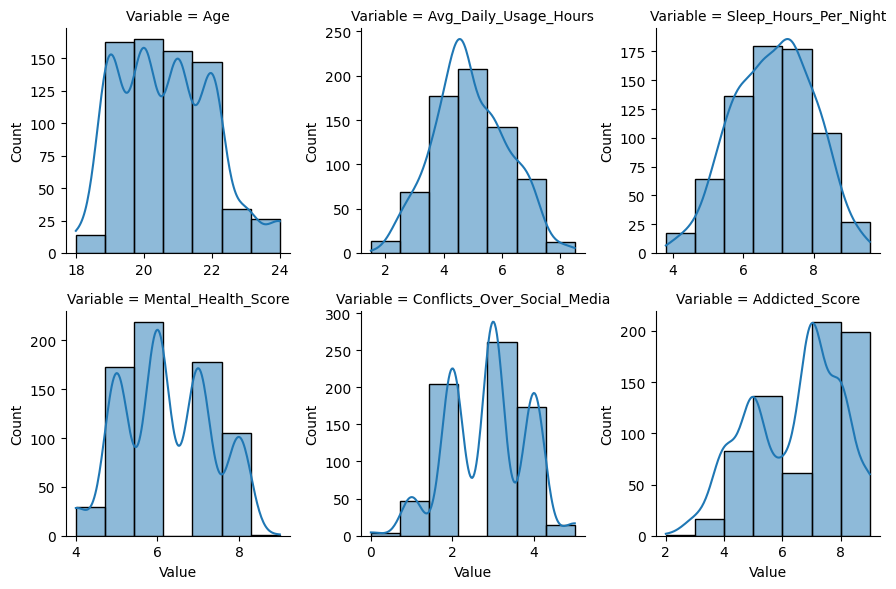

In [ ]:
numeric_df = df.select_dtypes(include='number').drop(columns=['Student_ID'])

df_melted = numeric_df.melt(var_name='Variable', value_name='Value')


g = sns.FacetGrid(df_melted, col='Variable', col_wrap=3, sharex=False, sharey=False)
g.map(sns.histplot, 'Value', bins=7, kde=True)

plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


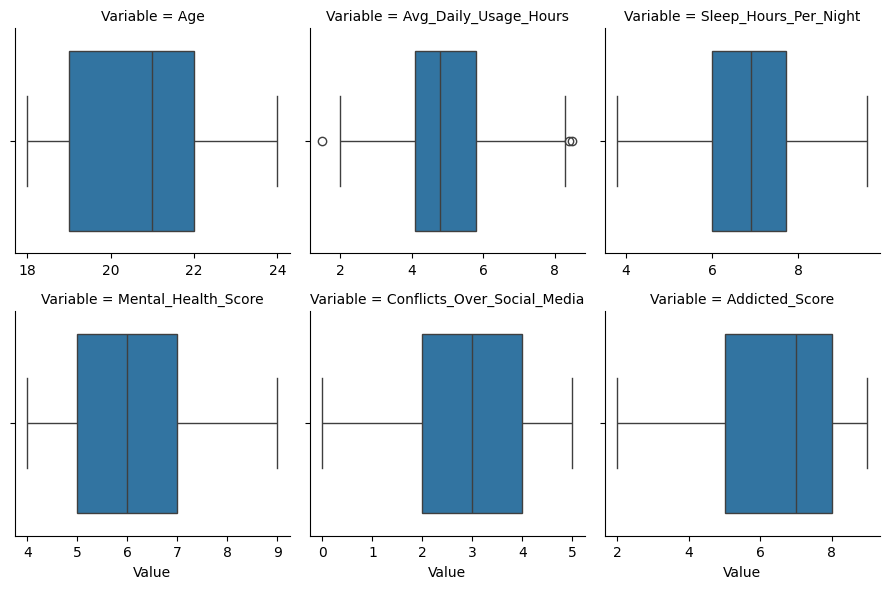

In [ ]:
g = sns.FacetGrid(df_melted, col='Variable', col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, 'Value')

plt.tight_layout()
plt.show()

Se evidencia que los valores extremos se pueden contar con una mano y están de acuerdo con la distribución de la variable. Por lo tanto, se conservarán, dado que sus valores son plausibles y aportan información valiosa.

In [ ]:
# Check for a different format
len(numeric_df.columns) == len(numeric_df.select_dtypes(include='number').columns)

True

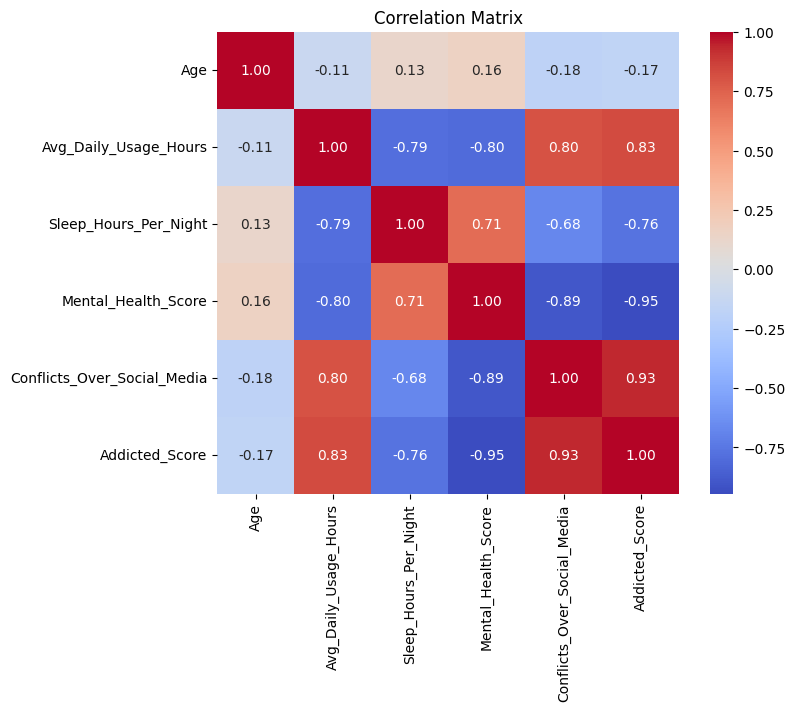

In [ ]:
corr_matrix = numeric_df.corr()


plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Matrix")
plt.show()

In [ ]:
country_counts = df['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'count']

fig = px.choropleth(
    country_counts,
    locations='Country',
    locationmode='country names',
    color='count',
    color_continuous_scale='Viridis',
    title='Registros por Pais'
)
fig.show()

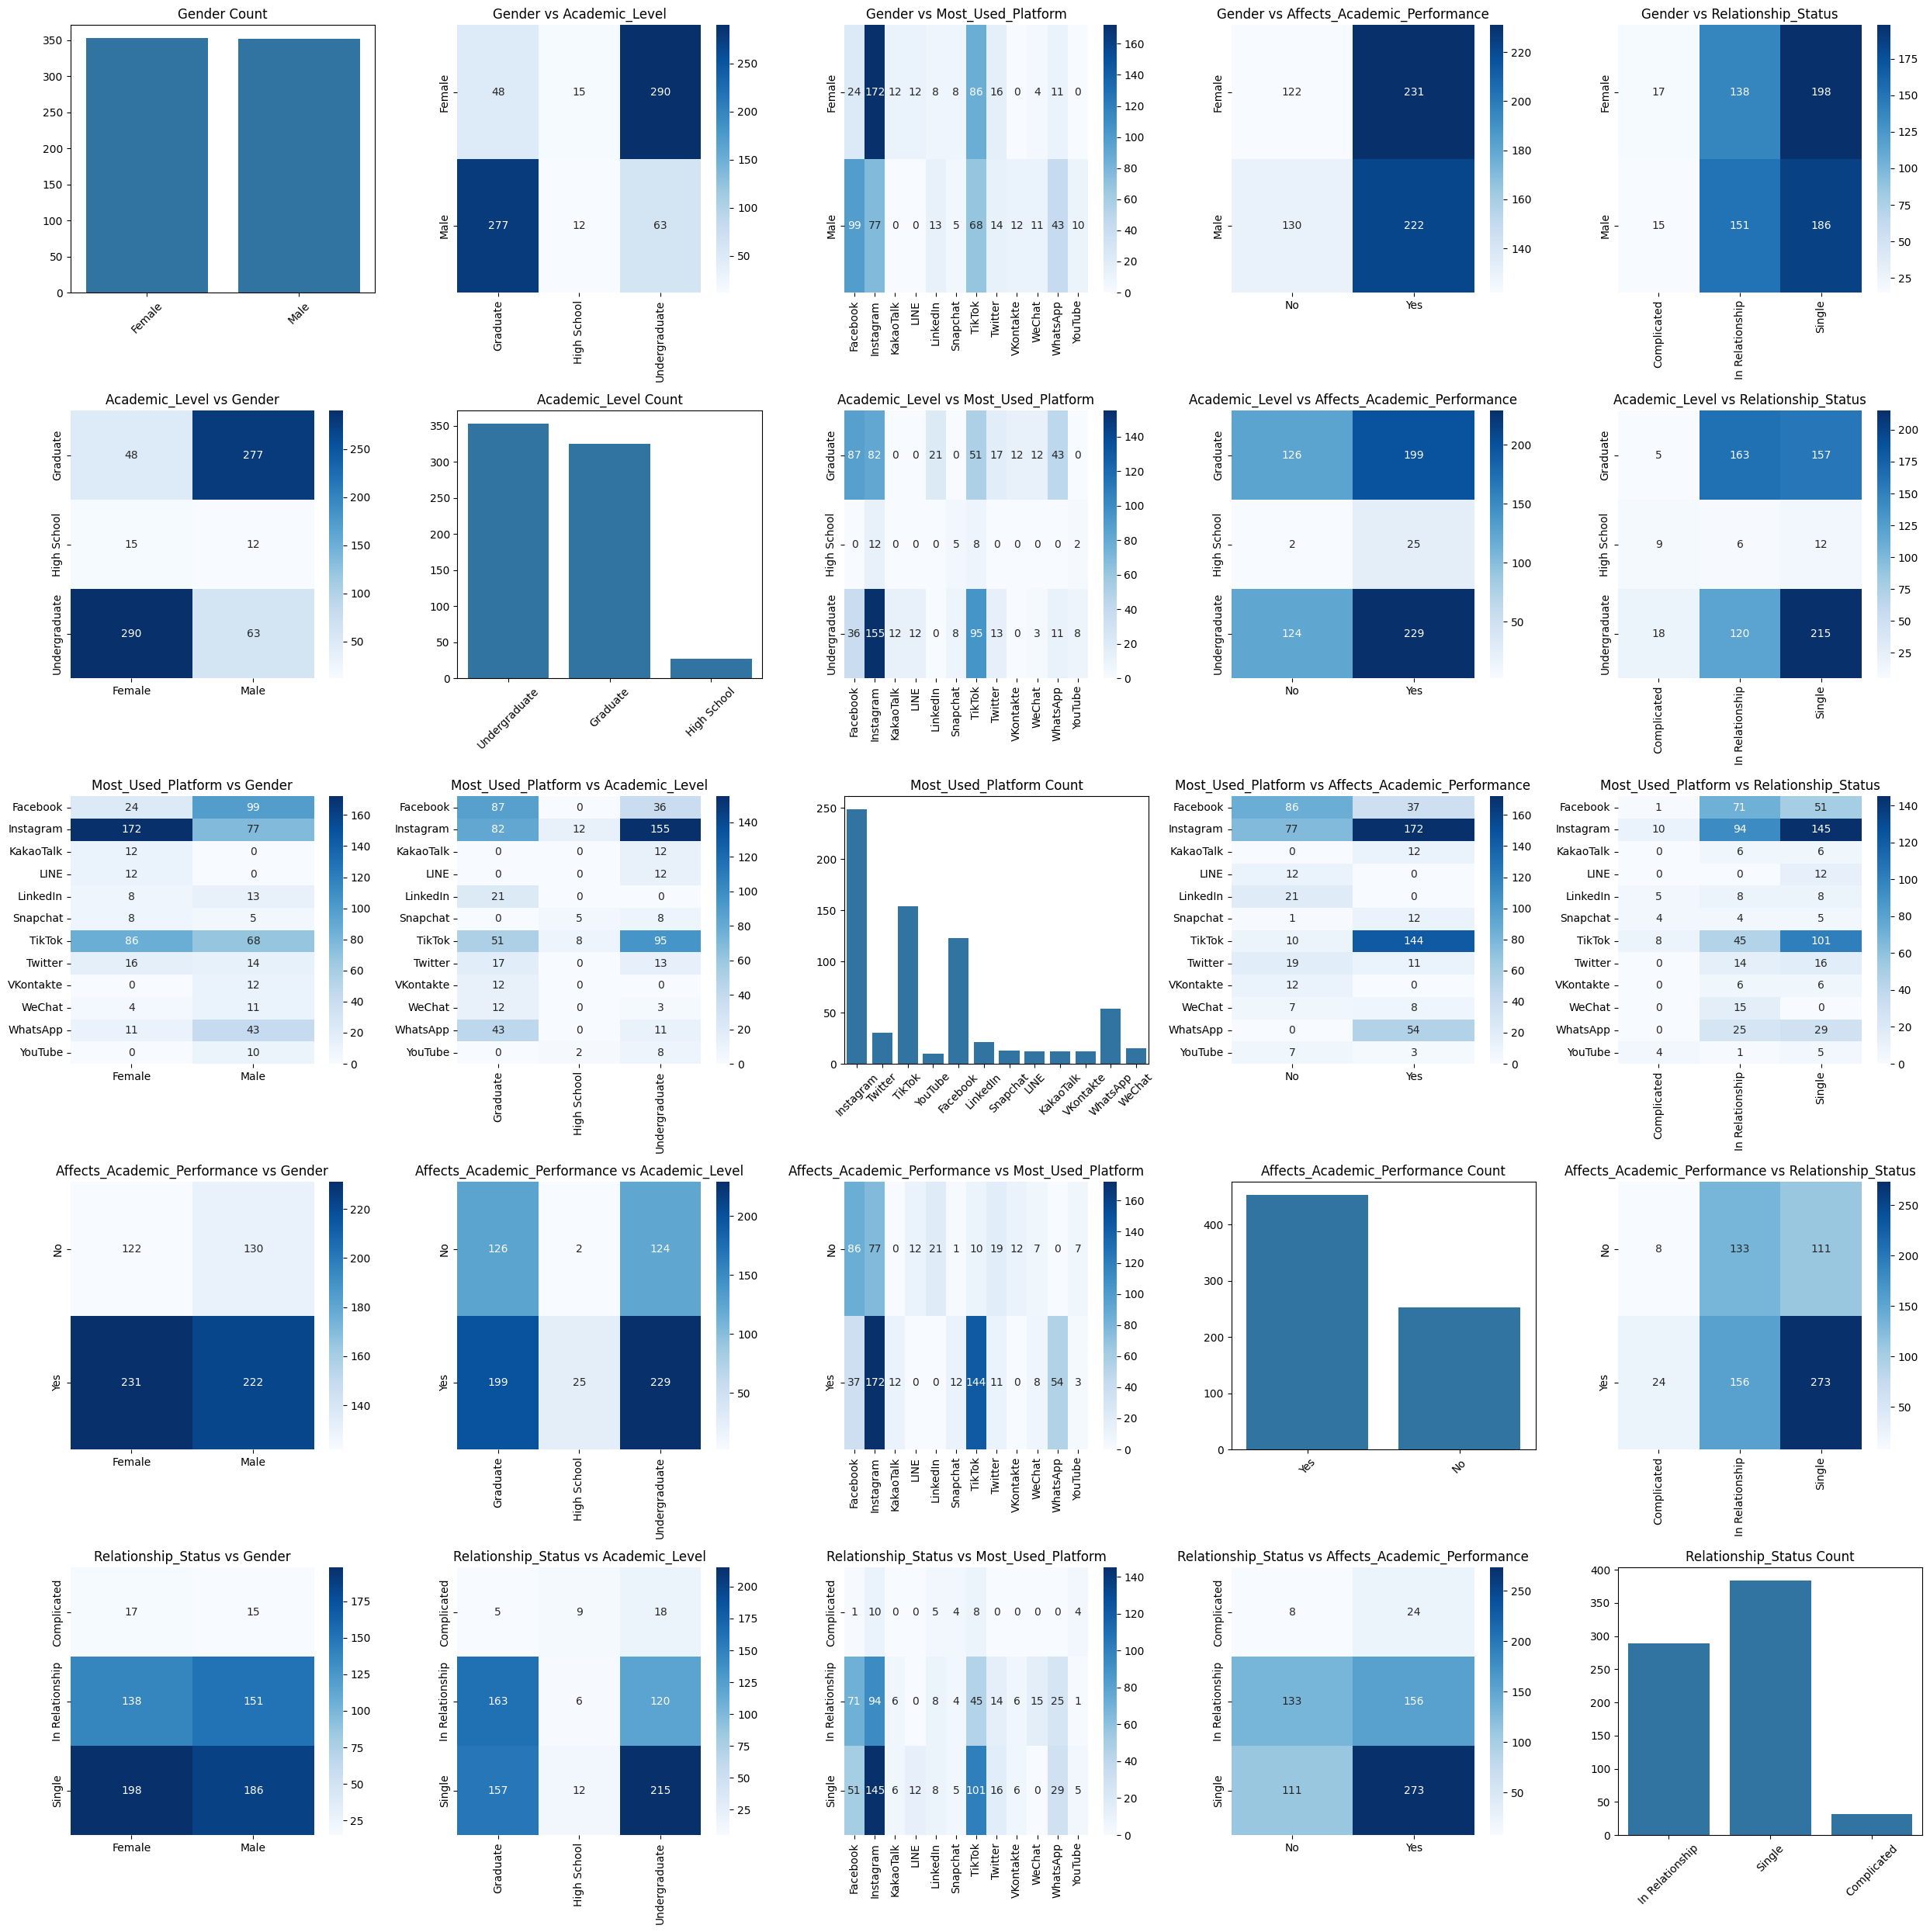

In [ ]:
cat_cols = [col for col in df.select_dtypes(include='object').columns.values if col != 'Country']

n = len(cat_cols)
fig, axes = plt.subplots(n, n, figsize=(5*n, 5*n))

for i, col1 in enumerate(cat_cols):
    for j, col2 in enumerate(cat_cols):
        ax = axes[i, j]

        if col1 == col2:
            # Plot value counts as barplot for diagonals
            sns.countplot(data=df, x=col1, ax=ax)
            ax.set_title(f'{col1} Count')
            ax.tick_params(axis='x', rotation=45)
        else:
            # Crosstab heatmap
            ct = pd.crosstab(df[col1], df[col2])
            sns.heatmap(ct, annot=True, cmap='Blues', fmt='d', ax=ax)
            ax.set_title(f'{col1} vs {col2}')

        ax.set_xlabel('')
        ax.set_ylabel('')

plt.tight_layout()
plt.show()

In [ ]:
cat_cols

['Gender',
 'Academic_Level',
 'Most_Used_Platform',
 'Affects_Academic_Performance',
 'Relationship_Status']

In [ ]:
# Check that all variables in the categorical variaables are expected by the categories
for col in cat_cols:
    print(set(df.loc[:,col].values))

{'Male', 'Female'}
{'Graduate', 'Undergraduate', 'High School'}
{'WeChat', 'KakaoTalk', 'Twitter', 'LinkedIn', 'TikTok', 'WhatsApp', 'LINE', 'Facebook', 'VKontakte', 'Instagram', 'Snapchat', 'YouTube'}
{'No', 'Yes'}
{'Complicated', 'Single', 'In Relationship'}
